# Annually Averaged Scalar Timeseries

This notebook shows how we extract information from ocean_scalar to plot timeseries. The data are resampled onto annual averages.


**Requirements:** The `conda/analysis3-20.10` (or later) module on the VDI (or your own up-to-date cookbook installation).

**Firstly,** load in the required libraries:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client

It's often a good idea to start a cluster with multiple cores for you to work with. It's not strictly necessary in this case.

In [2]:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:38169 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 48 Memory: 202.49 GB


Connect to the default database:

In [3]:
session = cc.database.create_session()

**Next,** we show to plot a single variable from a single experiment. The variable is loaded using ```querying.getvar()```. 

In [4]:
expt =  '025deg_jra55v13_ryf8485_gmredi6'
variable = 'ke_tot'
darray = cc.querying.getvar(expt, variable, session)

Note that this timeseries is monthly so we need to use ```groupby``` and a time mean to resample the data onto annual frequency. 

In [5]:
annual_average = darray.groupby('time.year').mean(dim='time')

**Then,** the data can be plotted as you see fit:

Text(0.5, 1.0, '025deg_jra55v13_ryf8485_gmredi6')

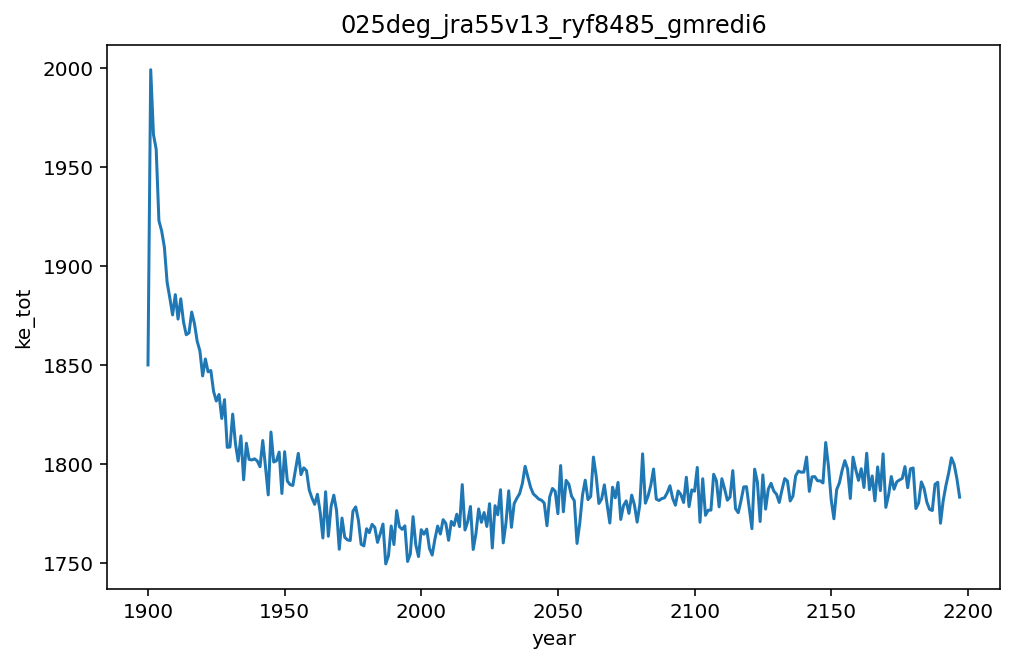

In [6]:
plt.figure(figsize=(8,5))
annual_average.plot()
plt.title(expt)